        Date/Time  Mean Temp  Total Precip (mm)
13149  2012-01-01       -3.7                0.0
13150  2012-01-02       -1.1                1.6
13151  2012-01-03       -0.7               41.0
13152  2012-01-04        2.8               49.5
13153  2012-01-05        1.2                3.4
        Mean Temp  Total Precip (mm)
count  440.000000         440.000000
mean    -0.096818           5.315682
std      4.416591           9.622317
min    -18.200000           0.000000
25%     -1.800000           0.000000
50%      0.900000           1.150000
75%      2.425000           6.450000
max     11.000000          66.000000

 Number of NaNs: 
 Date/Time              0
Mean Temp            102
Total Precip (mm)    102
dtype: int64
18.82 % of rows have at least one NaN


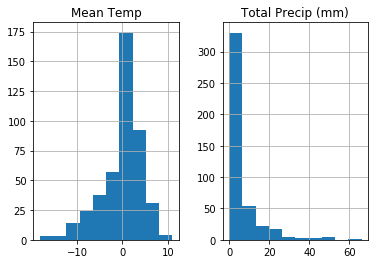

In [25]:
# Visualize and inspect weather data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data_path = './whistler_weather_good.csv'
# df = pd.read_csv(data_path, usecols=["Date/Time","Data Quality","Max Temp (°C)","Min Temp (°C)",
# 	"Mean Temp (°C)","Heat Deg Days (°C)","Cool Deg Days (°C)","Total Rain (mm)",
# 	"Total Snow (cm)","Total Precip (mm)","Snow on Grnd (cm)"])

df = pd.read_csv(data_path, usecols=["Date/Time",'Year','Month',"Mean Temp", "Total Precip (mm)"])

# Delete the years and months not of interest
delete_years = np.arange(1976,2012)
delete_months = np.arange(4,13)

df = df[~df['Year'].isin(delete_years)]
df = df[~df['Month'].isin(delete_months)]

df = df.drop(['Year', 'Month'], axis=1)

# See what the data set looks like
print(df.head())
print(df.describe())

# Nan's
numNan = df.isna().sum()
nanPct = round(100 * np.max(numNan) / df.shape[0],2) 
print('\n Number of NaNs: \n',numNan)
print(nanPct, '% of rows have at least one NaN')

# Histogram
hist = df.hist(bins=10)
plt.show()

                     Name          Province Climate ID  Station ID  WMO ID  \
0             ACTIVE PASS  BRITISH COLUMBIA    1010066          14     NaN   
1             ALBERT HEAD  BRITISH COLUMBIA    1010235          15     NaN   
2  BAMBERTON OCEAN CEMENT  BRITISH COLUMBIA    1010595          16     NaN   
3              BEAR CREEK  BRITISH COLUMBIA    1010720          17     NaN   
4             BEAVER LAKE  BRITISH COLUMBIA    1010774          18     NaN   

  TC ID  Latitude (Decimal Degrees)  Longitude (Decimal Degrees)   Latitude  \
0   NaN                       48.87                      -123.28  485200000   
1   NaN                       48.40                      -123.48  482400000   
2   NaN                       48.58                      -123.52  483500000   
3   NaN                       48.50                      -124.00  483000000   
4   NaN                       48.50                      -123.35  483000000   

    Longitude  Elevation (m)  First Year  Last Year  HLY

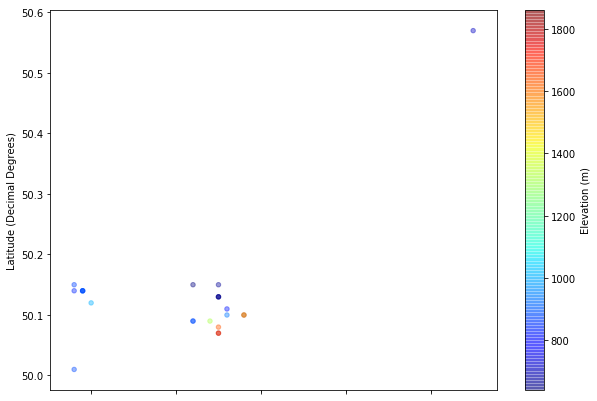

24 weather stations in area of interest were saved.


In [20]:
# Weather Station locations
import matplotlib.pyplot as plt
import pandas as pd

station_df = pd.read_csv('./stationInventoryEN.csv', header=3)
print(station_df.head())

latitude, longitude, elevation = station_df['Latitude (Decimal Degrees)'], station_df['Longitude (Decimal Degrees)'], station_df['Elevation (m)']

# crudely strip away long/lats outside of Sea to Sky Corridor
# rough box with top left corner: Manatee peak. bottom right corner: Galaxy Peak
station_df = station_df[station_df['Latitude (Decimal Degrees)'] > 49.70] 
station_df = station_df[station_df['Latitude (Decimal Degrees)'] < 50.58] 

station_df = station_df[station_df['Longitude (Decimal Degrees)'] < -122.49]
station_df = station_df[station_df['Longitude (Decimal Degrees)'] > -123.70]

# optional elevation filter
station_df = station_df[station_df['Elevation (m)'] > 500.0]

# inspect nans
numNan = station_df.isna().sum()
print('\n Number of NaNs: \n',numNan)

# plot
station_df.plot(kind="scatter", x="Longitude (Decimal Degrees)", y="Latitude (Decimal Degrees)",
                c="Elevation (m)", cmap=plt.get_cmap("jet"),
                colorbar=True, alpha=0.4, figsize=(10,7),)
plt.show()

# save
station_df.to_csv('weatherStationsS2S.csv')
print(station_df.shape[0], 'weather stations in area of interest were saved.')
